In [13]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

import sys
import os
project_path = os.path.expanduser('~/repos/metric_graph/')
sys.path.append(project_path)
from calculations.helper_functions import style_plot

In [14]:
load_data = False

In [15]:
if load_data:

    file = open("../data/rgg/coefficients/coefficients.pkl", "rb")
    coefficients = pickle.load(file)
    file.close()

    file = open("../data/rgg/torus_eigenvalues/torus_eigenvalues.pkl", "rb")
    torus_eigenvalues = pickle.load(file)
    file.close()

In [16]:
coefficients_means = []
coefficients_nums_Vs = np.sort(list(coefficients.keys()))
for num_Vs in coefficients:
    coefficients_means.append(np.mean(coefficients[num_Vs]))
coefficients_means = np.array(coefficients_means)
print(coefficients_means)

print()

torus_means = []
torus_nums_Vs = np.sort(list(torus_eigenvalues.keys()))
for num_Vs in torus_eigenvalues:
    torus_means.append(np.mean(list(torus_eigenvalues[num_Vs].values())))
torus_means = np.array(torus_means)
print(torus_means)

[0.6899835  0.67449526 0.67992539 0.68383383 0.68214876 0.68497168
 0.68379039 0.68155196 0.68121621 0.68038494 0.67810716]

[3.6325397  3.6121507  3.60509739 3.62795532 3.64154365 3.64900797
 3.65954662 3.65574566 3.6573525 ]


In [19]:
c = coefficients_means[-1]
m, n = 1, 0 # fundamental eigenvalues
torus_continuum_eigenvalue = c * ((2 * m * np.pi)**2 + (2 * n * np.pi)**2) / 2

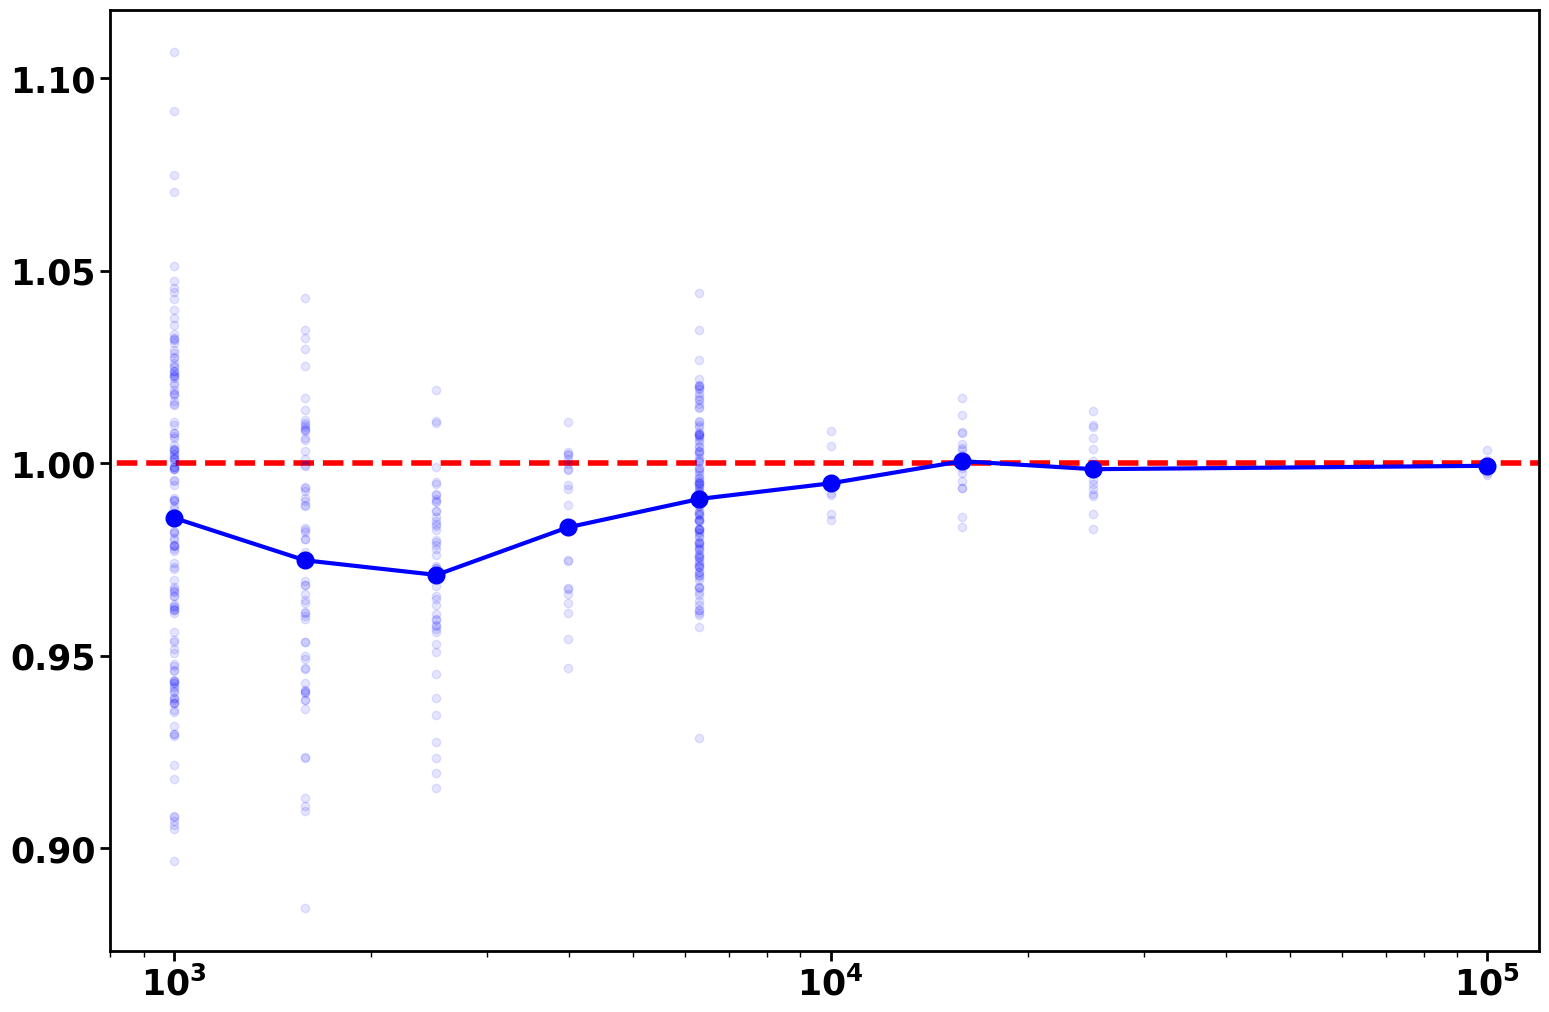

In [36]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

eigenvalue_linewidth = 3
eigenvalue_markersize = 12
ax.plot(torus_nums_Vs, torus_means**2 / torus_continuum_eigenvalue, 'o-', c='b', linewidth=eigenvalue_linewidth, markersize=eigenvalue_markersize)
ax.set_xscale('log')
ax.hlines(y=1., xmin=50, xmax=1500000, color='r', linestyle='--', linewidth=4, zorder=0)

for num_Vs in torus_nums_Vs:
    y = np.mean(list(torus_eigenvalues[num_Vs].values()), axis=1)**2 / torus_continuum_eigenvalue
    x = np.ones(len(y)) * num_Vs
    ax.scatter(x, y, c='b', zorder=0, alpha=0.1)

ax.set_xlim([800, 120000])

style_plot(fig, ax, aspect=None)

# plt.savefig("../figures/rgg/eigenvalue_raw_plot.png", dpi=300, bbox_inches="tight")
